In [44]:
!pip install gensim
!pip install pyLDAvis

In [13]:
import re
import nltk
import numpy as np
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('punkt')
from gensim import corpora, models
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [37]:
text = ["Today weather is hot.",
        "Hot weather is dengerous.",
        "I don't drink hot water.",
        "The sun is very strong today.",
        "Extreme heat can cause health problems.",
        "Formula 1 cars are incredibly fast.",
        "The race car driver sped around the track.",
        "Spectators cheered as the horses crossed the finish line.",
        "It was a close race to the finish.",
        "The jockey guided the horse to victory.",
        "The checkered flag waved.",
        "The stock market is volatile.",
        "Investing in stocks can be risky.",
        "Bonds are generally safer than stocks.",
        "Diversification is key in investing.",
        "The economy is showing signs of recovery.",
        "Interest rates are expected to rise.",
        "Inflation is a concern for investors.",
        "Real estate prices are increasing.",
        "Buying a house is a major investment.",
        "The housing market is booming.",
        "Mortgage rates are still low.",
        "Renting an apartment can be more flexible.",
        "Property taxes vary by location.",
        "Commercial real estate is also growing.",
        "Investing in real estate requires research."]


In [38]:
# TASK 1
# Text Preprocessing
def preprocess_text(document):
    document = document.lower()
    tokens = word_tokenize(document)
    tokens = [re.sub(r'[^\w\s]', '', word) for word in tokens]
    tokens = [word for word in tokens if word and word not in stopwords.words('english')]
    return tokens

preprocessed_text = [preprocess_text(doc) for doc in text]
# Lowercased text, removed punctuation and stopwords, and tokenized documents
print(preprocessed_text)

[['today', 'weather', 'hot'], ['hot', 'weather', 'dengerous'], ['nt', 'drink', 'hot', 'water'], ['sun', 'strong', 'today'], ['extreme', 'heat', 'cause', 'health', 'problems'], ['formula', '1', 'cars', 'incredibly', 'fast'], ['race', 'car', 'driver', 'sped', 'around', 'track'], ['spectators', 'cheered', 'horses', 'crossed', 'finish', 'line'], ['close', 'race', 'finish'], ['jockey', 'guided', 'horse', 'victory'], ['checkered', 'flag', 'waved'], ['stock', 'market', 'volatile'], ['investing', 'stocks', 'risky'], ['bonds', 'generally', 'safer', 'stocks'], ['diversification', 'key', 'investing'], ['economy', 'showing', 'signs', 'recovery'], ['interest', 'rates', 'expected', 'rise'], ['inflation', 'concern', 'investors'], ['real', 'estate', 'prices', 'increasing'], ['buying', 'house', 'major', 'investment'], ['housing', 'market', 'booming'], ['mortgage', 'rates', 'still', 'low'], ['renting', 'apartment', 'flexible'], ['property', 'taxes', 'vary', 'location'], ['commercial', 'real', 'estate', 

In [39]:
# TASK 2
# TF-IDF Analysis

joined_documents = [" ".join(doc) for doc in preprocessed_text]

vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(joined_documents)
feature_names = vectorizer.get_feature_names_out()

for i, document in enumerate(text):
    tfidf_row = tfidf_matrix[i]
    top_indices = tfidf_row.toarray().flatten().argsort()[-10:][::-1]
    top_words_scores = [(feature_names[idx], tfidf_row[0, idx]) for idx in top_indices]

    print(f"Document: {document}")
    print("Top 10 words with TF-IDF scores:")
    for word, score in top_words_scores:
        print(f"- {word}: {score:.4f}")
    print("\n")

Document: Today weather is hot.
Top 10 words with TF-IDF scores:
- weather: 0.5946
- today: 0.5946
- hot: 0.5411
- guided: 0.0000
- extreme: 0.0000
- fast: 0.0000
- finish: 0.0000
- flag: 0.0000
- flexible: 0.0000
- formula: 0.0000


Document: Hot weather is dengerous.
Top 10 words with TF-IDF scores:
- dengerous: 0.6402
- weather: 0.5682
- hot: 0.5170
- guided: 0.0000
- fast: 0.0000
- finish: 0.0000
- flag: 0.0000
- flexible: 0.0000
- formula: 0.0000
- generally: 0.0000


Document: I don't drink hot water.
Top 10 words with TF-IDF scores:
- water: 0.5233
- drink: 0.5233
- nt: 0.5233
- hot: 0.4226
- weather: 0.0000
- growing: 0.0000
- fast: 0.0000
- finish: 0.0000
- flag: 0.0000
- flexible: 0.0000


Document: The sun is very strong today.
Top 10 words with TF-IDF scores:
- sun: 0.5989
- strong: 0.5989
- today: 0.5315
- weather: 0.0000
- guided: 0.0000
- extreme: 0.0000
- fast: 0.0000
- finish: 0.0000
- flag: 0.0000
- flexible: 0.0000


Document: Extreme heat can cause health problems.


Words similar to 'weather':
- recovery: 0.2699
- car: 0.2529
- guided: 0.2008
- sun: 0.1957
- checkered: 0.1753
- hot: 0.1702
- fast: 0.1503
- investment: 0.1497
- housing: 0.1477
- water: 0.1452


Words similar to 'hot':
- waved: 0.3698
- heat: 0.2120
- concern: 0.2018
- stocks: 0.1992
- recovery: 0.1888
- renting: 0.1727
- incredibly: 0.1713
- weather: 0.1702
- spectators: 0.1528
- horses: 0.1485


Words similar to 'race':
- requires: 0.3079
- waved: 0.2796
- safer: 0.2344
- investment: 0.1906
- property: 0.1787
- renting: 0.1672
- checkered: 0.1628
- weather: 0.1390
- real: 0.1321
- buying: 0.1287


Words similar to 'horse':
- stocks: 0.2855
- 1: 0.2707
- extreme: 0.2599
- buying: 0.2540
- signs: 0.2054
- estate: 0.1891
- economy: 0.1676
- checkered: 0.1424
- bonds: 0.1405
- driver: 0.1076




/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


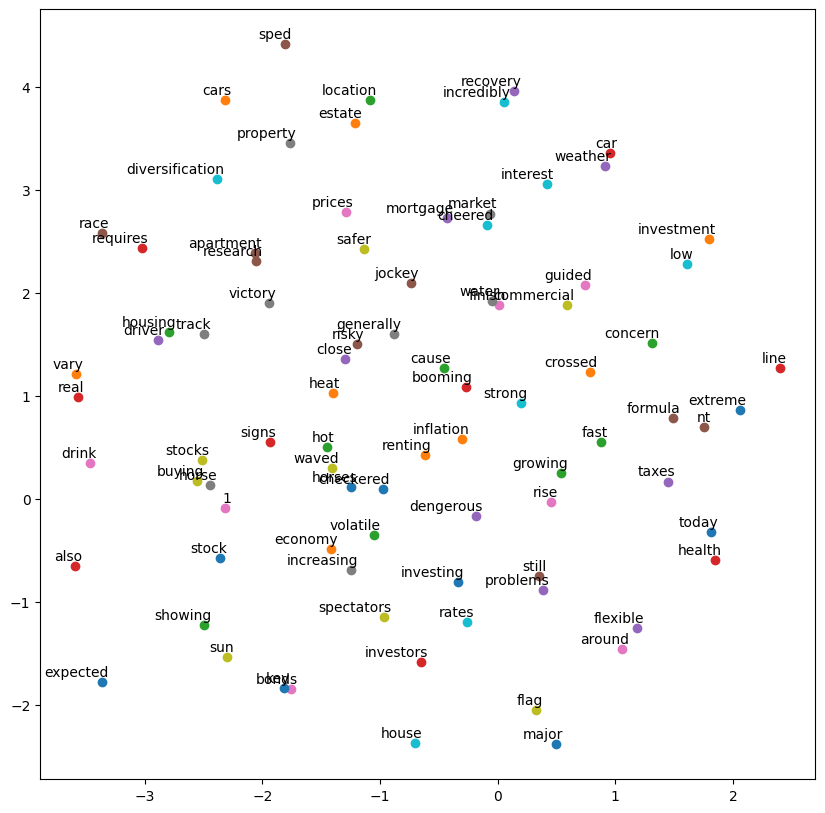

In [65]:
# TASK 3
# Word2Vec Embeddings

if preprocessed_text and any(preprocessed_text):
    model = Word2Vec(sentences=preprocessed_text, vector_size=100, window=5, min_count=1, workers=4)

    words = ['weather', 'hot', 'race', 'horse']
    for word in words:
        if word in model.wv:
            similar_words = model.wv.most_similar(word)
            print(f"Words similar to '{word}':")
            for similar_word, score in similar_words:
                print(f"- {similar_word}: {score:.4f}")
            print("\n")
        else:
            print(f"'{word}' not in vocabulary.\n")

    if model.wv.key_to_index:
        labels = []
        tokens = []

        for word in model.wv.key_to_index:
            tokens.append(model.wv[word])
            labels.append(word)

        if len(tokens) > 1:
            tsne_model = TSNE(perplexity=min(30, len(tokens) - 1), n_components=2, init='pca', n_iter=2500, random_state=23)
            new_values = tsne_model.fit_transform(np.array(tokens))

            x = []
            y = []
            for value in new_values:
                x.append(value[0])
                y.append(value[1])

            plt.figure(figsize=(10, 10))
            for i in range(len(x)):
                plt.scatter(x[i], y[i])
                plt.annotate(labels[i],
                             xy=(x[i], y[i]),
                             xytext=(5, 2),
                             textcoords='offset points',
                             ha='right',
                             va='bottom')
            plt.show()
        else:
            print("Vocabulary size too small for meaningful visualization.")
    else:
        print("Vocabulary is empty, cannot visualize.")
else:
    print("Preprocessed text is empty, cannot train Word2Vec model.")

In [63]:
# TASK 4
# Topic Modeling

stopwords_list = stopwords.words('english')
texts = [[word for word in document.lower().split() if word not in stopwords_list] for document in text]

dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

lda_model = models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=4, passes=10)

print("Top words for each topic:")
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic {idx+1}:\n{topic}\n")

print("Dominant topic for each document:")
for i, doc_bow in enumerate(corpus):
    topic_distribution = lda_model.get_document_topics(doc_bow)
    dominant_topic = max(topic_distribution, key=lambda x: x[1])
    print(f"Document: \"{text[i]}\" -> Dominant Topic: {dominant_topic[0]+1} (Score: {dominant_topic[1]:.4f})")

Top words for each topic:
Topic 1:
0.040*"investing" + 0.022*"spectators" + 0.022*"crossed" + 0.022*"finish" + 0.022*"horses" + 0.022*"cheered" + 0.022*"line." + 0.022*"cause" + 0.022*"1" + 0.022*"cars"

Topic 2:
0.041*"estate" + 0.041*"real" + 0.041*"race" + 0.023*"around" + 0.023*"driver" + 0.023*"track." + 0.023*"sped" + 0.023*"car" + 0.023*"also" + 0.023*"commercial"

Topic 3:
0.052*"rates" + 0.029*"market" + 0.029*"still" + 0.029*"expected" + 0.029*"mortgage" + 0.029*"rise." + 0.029*"low." + 0.029*"interest" + 0.029*"waved." + 0.029*"investing."

Topic 4:
0.063*"hot" + 0.035*"weather" + 0.035*"signs" + 0.035*"showing" + 0.035*"economy" + 0.035*"recovery." + 0.035*"renting" + 0.035*"drink" + 0.035*"apartment" + 0.035*"dengerous."

Dominant topic for each document:
Document: "Today weather is hot." -> Dominant Topic: 2 (Score: 0.8097)
Document: "Hot weather is dengerous." -> Dominant Topic: 4 (Score: 0.8115)
Document: "I don't drink hot water." -> Dominant Topic: 4 (Score: 0.8124)
D

In [64]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis)